In [45]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/128-denoised/FlatContinuumIsotropic.inc970.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [46]:
arr = y_arr[10]

In [47]:
# arr = arr.reshape(384, 512)

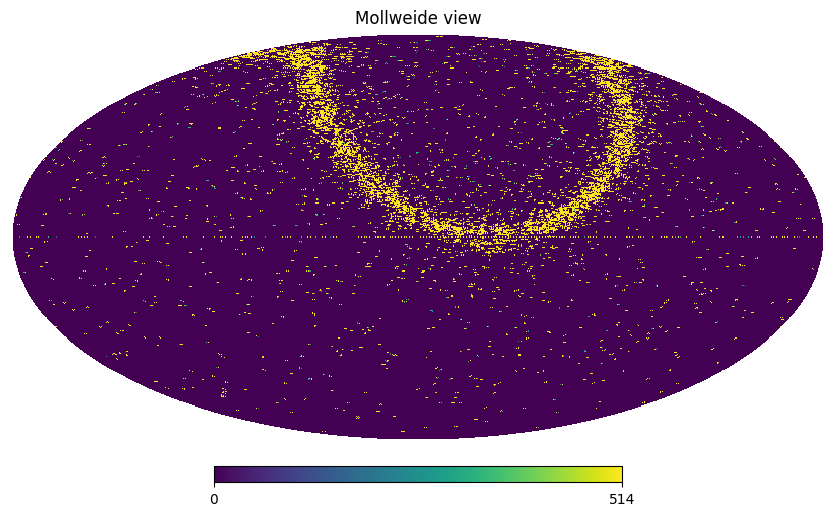

In [93]:
import healpy as hp
hp.mollview(arr)

(10491,) (10491,)


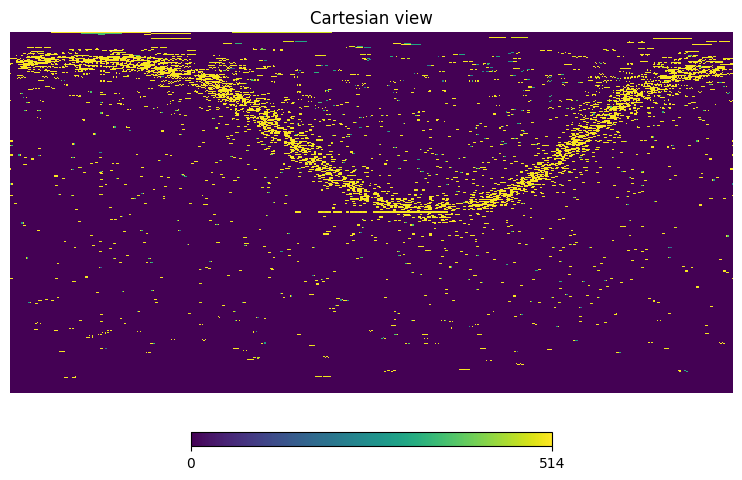

In [142]:
# Convert to cartesian
cart_arr = hp.cartview(arr, xsize=512, ysize=384, return_projected_map=True)

x = []
y = []

for i in range(len(cart_arr)):
    for j in range(len(cart_arr[0])):
        # if some value, put in output mesh
        if cart_arr[i][j] > 0:
            x.append(i)
            y.append(cart_arr[i][j])

x = np.array(x)
y = np.array(y)

print(x.shape, y.shape)

In [143]:
# import healpy as hp
# import numpy as np
# import matplotlib.pyplot as plt

# def healpix_to_spherical(healpix_array):
#     nside = hp.get_nside(healpix_array)
#     theta, phi = hp.pix2ang(nside, np.arange(len(healpix_array)))
#     return theta, phi

# def spherical_to_2d_grid(theta, phi, grid_size):
#     # Convert spherical coordinates to 2D grid coordinates
#     x = (phi / (2 * np.pi)) * grid_size[1]
#     y = ((np.pi / 2 - theta) / np.pi) * grid_size[0]
#     return x, y

# def plot_2d_grid(x, y, grid_size):
#     # Create a 2D grid
#     grid = np.zeros(grid_size)

#     # Fill the grid with values from the spherical coordinates
#     for i in range(len(x)):
#         xi, yi = int(x[i]), int(y[i])
#         grid[yi, xi] = y[i]

#     # Display the 2D grid
#     plt.imshow(grid, origin='lower', extent=[0, grid_size[1], 0, grid_size[0]])
#     plt.colorbar()
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title('2D Grid Projection')
#     plt.show()


# # Example usage with an array of size 384x512
# array_size = (584, 32)
# healpix_array = arr

# theta, phi = healpix_to_spherical(healpix_array)
# x, y = spherical_to_2d_grid(theta, phi, array_size)
# plot_2d_grid(x, y, array_size)

# print(x)

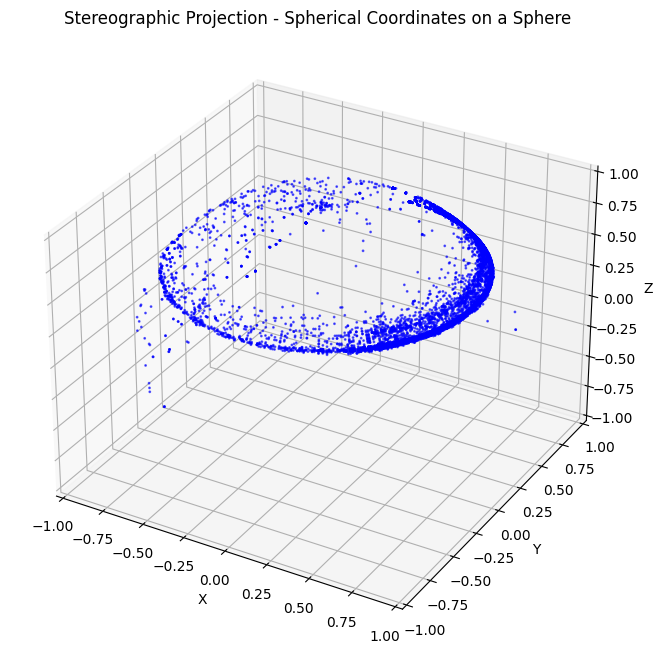

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def grid_to_spherical(x, y, grid_size):
    # Convert 2D grid coordinates to spherical coordinates
    phi = 2 * np.pi * (x / grid_size[1])
    theta = np.pi * (1 - y / grid_size[0])
    return theta, phi

def stereographic_projection(theta, phi):
    # Convert spherical coordinates to 3D Cartesian coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_sphere(x, y, z):
    # Create a 3D plot for the sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere
    ax.scatter(x, y, z, s=1, c='b', alpha=0.6)

    # Set plot limits and labels
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Stereographic Projection - Spherical Coordinates on a Sphere')

    plt.show()

# Example usage
# Replace 'grid_size' with the size of your 2D grid (384, 512)
array_size = (384, 512)
theta, phi = grid_to_spherical(x, y, array_size)
x, y, z = stereographic_projection(theta, phi)
plot_sphere(x.flatten(), y.flatten(), z.flatten())


In [145]:
print(theta.shape)

(10491,)


In [140]:
import numpy as np
import healpy as hp

def convert_to_healpix_indices(x, y, z, nside):
    # Convert (x, y, z) to polar coordinates (theta, phi)
    theta = np.arccos(z)
    phi = np.arctan2(y, x)

    # Convert (theta, phi) to Healpix indices
    healpix_indices = hp.ang2pix(nside, theta, phi)

    return healpix_indices

# Example usage:
x_coords = x
y_coords = y
z_coords = z
nside = 128  # Choose the desired resolution of your Healpix map

hp.moll

TypeError: bad number of pixels